In [2]:
from IPython.display import display, Math, Latex

import pandas as pd
import numpy as np
import numpy_financial as npf
import yfinance as yf
import matplotlib.pyplot as plt

# Total Return Examples

Example 1: You bought TD bank for $\$72.50$ and sold one year later for $\$78.45$.  During that year, $2.75 of dividends were paid.  What is the total \% return?

Example 2: A 6\% $\$1000$ face value bond was bought for $\$95.50$ and sold after one year for $\$98.65$. Assume that coupons are paid annually.  What is the total \% return?



In [3]:
Cash_Flow=2.75
Begin_Value=72.50
End_Value=78.45

Total_Return=100*(Cash_Flow + (End_Value-Begin_Value))/Begin_Value
print("The Total Return is: ", round(Total_Return,2),"%", sep='')

The Total Return is: 12.0%


## Percentage Returns, Expected Returns and Correlations


In [4]:
Stock1='NFLX'
Stock2='^GSPC'
Ticker1 = yf.Ticker(Stock1)
Ticker2 = yf.Ticker(Stock2)

start_date = '2018-01-01'
end_date = '2021-10-25'

Stock1_hist = Ticker1.history(start=start_date, end=end_date)
Stock2_hist = Ticker2.history(start=start_date, end=end_date)

prices = pd.DataFrame(Stock1_hist['Close'])
prices.columns = [Stock1]
prices[Stock2] = Stock2_hist['Close']
prices.head()


#Calculate the daily returns from the price dataFrame
daily_returns = prices.pct_change()


#Easiest to drop the first entry since it doesn't exist (why doesn't it exist?).
#Hint: Look-up at DataFrame.drop()

#daily_returns.drop(index=daily_returns.index[0], 
        #axis=0, 
        #inplace=True)

#daily_returns.head()

#Calculate the monthly returns from the price dataFrame.  On assignment #3 I had you do this the 
#painful way, you can use that code, or look-up DataFrame.resample('M').  Note that to do this
#you will need to handle the missing first row - .ffill will be useful.
monthly_returns=prices.resample('MS').first().pct_change()

#Now drop the first entry similar to above

monthly_returns.head()

,NFLX,^GSPC
Date,,
2018-01-01,NaN,NaN
2018-02-01,0.318297,0.046802
2018-03-01,0.095522,-0.051138
2018-04-01,-0.034781,-0.035774
2018-05-01,0.117771,0.028243


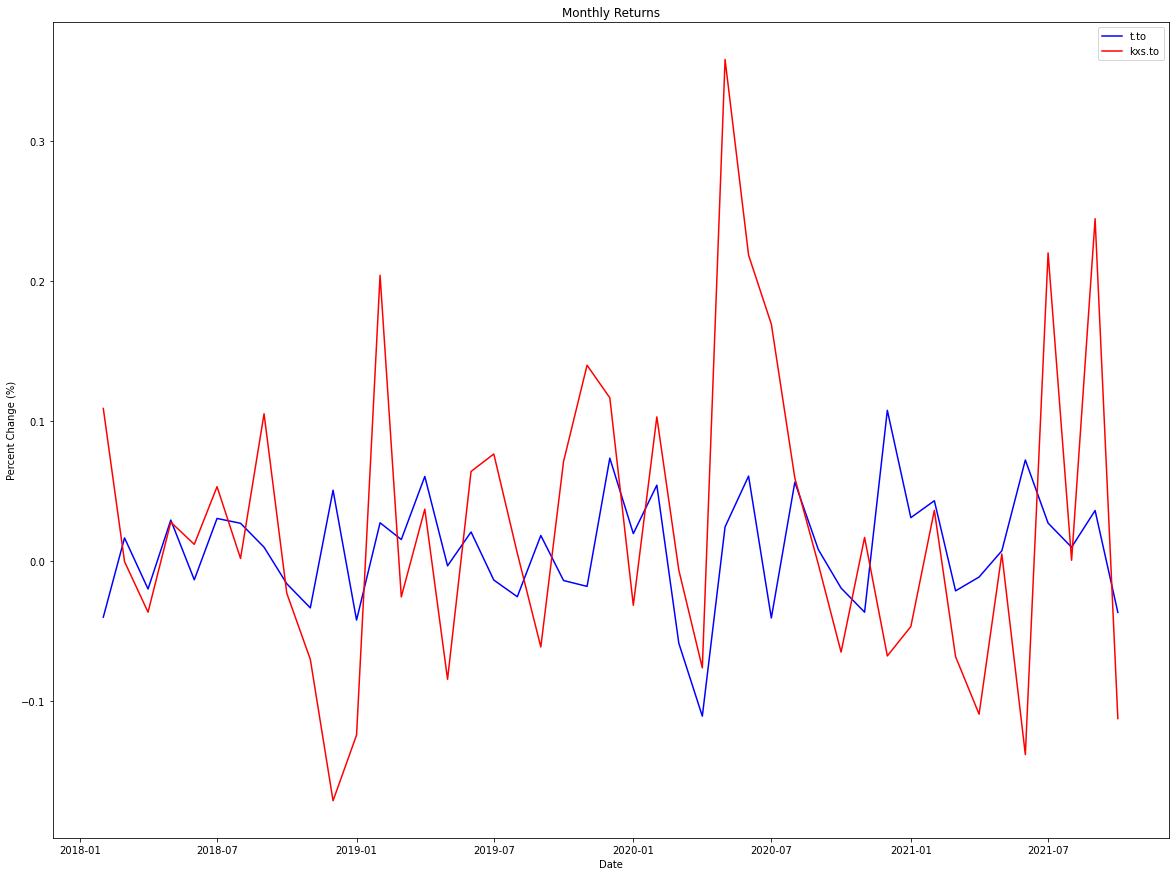

In [4]:
plt.figure(figsize=(20,15))

plt.plot(monthly_returns.index,monthly_returns[Stock1], color='b', label=Stock1)
plt.plot(monthly_returns.index,monthly_returns[Stock2], color='r', label=Stock2)
plt.legend(loc='best')
plt.title('Monthly Returns')
plt.xlabel('Date')
plt.ylabel('Percent Change (%)')

plt.show()

### Expected returns

\begin{align*}
E(X)=\overline{X}=\frac{\sum x_i}{N}
\end{align*}

where $x_i$ are individual returns of some security $X$, $N$ is the total number of observations (time periods for us)

### Variance

\begin{align*}
\sigma^2_X=\frac{\sum(x_i-\overline{X})^2}{N}
\end{align*}

### Standard Deviation

\begin{align*}
\sigma_X=\sqrt{\frac{\sum(x_i-\overline{X})}{N}}
\end{align*}

### Covariance

Let's consider the relationship between two securities $X$ and $Y$.

\begin{align*}
COV(X,Y)=\frac{\sum(x_i-\overline{X})\times(y_i-\overline{Y})}{N}
\end{align*}

### Correlation

Very similar to Covariance, except standardized so that it takes a value between $-1$ and $1$

\begin{align*}
COR(X,Y)=\frac{COV(X,Y)}{\sigma_X \times \sigma_Y}
\end{align*}


In [5]:
print('Expected Monthly Returns:')
print(monthly_returns.mean())

print('')

print('Standard Deviations')
print(monthly_returns.std())

print('')

print("Correlation:")
print(monthly_returns.corr())

Expected Monthly Returns:
t.to      0.008214
kxs.to    0.025353
dtype: float64

Standard Deviations
t.to      0.040912
kxs.to    0.111501
dtype: float64

Correlation:
            t.to    kxs.to
t.to    1.000000  0.194453
kxs.to  0.194453  1.000000


## Beta

Consider Security $X$ with returns given by $x_i$, and let the correponding market returns be $r_M$.  Beta is then given by:

\begin{align*}
\beta=\frac{COV(x_i,r_M)}{\sigma^2(r_M)}
\end{align*}

In [6]:
Stock1='NFLX'
MarketIndex='^GSPC' #This is the symbol yfinance uses for the S&P 500
Ticker1 = yf.Ticker(Stock1)
Ticker2 = yf.Ticker(MarketIndex)

start_date = '2018-01-01'
end_date = '2021-10-25'

Stock1_hist = Ticker1.history(start=start_date, end=end_date)
MarketIndex_hist = Ticker2.history(start=start_date, end=end_date)


In [7]:
prices = pd.DataFrame(Stock1_hist['Close'])
prices.columns = [Stock1]
prices[MarketIndex] = MarketIndex_hist['Close']
#prices.head()

#Do the same as before to get the monthly returns and then drop the first entry.

monthly_returns=


monthly_returns.head()

SyntaxError: invalid syntax (<ipython-input-7-f49272f84403>, line 8)

In [5]:
#calculate the market variance (you will need to reference the column correponding to the market)
MarketVar=monthly_returns[MarketIndex].var()

#calculate beta by taking a covariance (.cov()), and using MarketrVar that was just defined.
Beta=monthly_retursn.cov()/MarketVar

print(Beta)

print('')
print('Cell [0,0] is meaningless (to get beta, we divided by the variance of the market!)')
print('')

print('The Beta of Netflix is: ', Beta.iat[0,1])
print('The Beta of the Market is: ', Beta.iat[1,1])


NameError: name 'MarketIndex' is not defined